In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import scipy.stats

In [6]:
matplotlib.style.use('seaborn-v0_8-whitegrid')

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Load palmerpenguins dataset

Source:
https://github.com/allisonhorst/palmerpenguins

In [7]:
penguins_original = pd.read_csv(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    )

# Remove null values

In [8]:
nan_indexes = penguins_original.index[penguins_original.isna().any(axis=1)]
penguins = penguins_original.dropna(axis = 0, how = 'any').copy()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# species-sex tuple

In [12]:
penguins.loc[:,'species_sex_tuple'] = penguins.apply(lambda row: f"{row.species},{row.sex}", axis = 1)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_sex_tuple
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,"Adelie,male"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,"Adelie,female"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,"Adelie,female"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,"Adelie,female"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,"Adelie,male"
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,"Chinstrap,male"
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,"Chinstrap,female"
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,"Chinstrap,male"
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,"Chinstrap,male"


# Linear Regression

## bill_depth_mm vs bill_length_mm

### No discrimination

In [35]:
# penguins.loc [:, 'bill_length_mm'].corr(penguins.loc [:, 'bill_depth_mm'])
penguins.loc[:,['bill_length_mm', 'bill_depth_mm']].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.228626
bill_depth_mm,-0.228626,1.000000


A poor linear correlation. A linear regression is not useful.

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


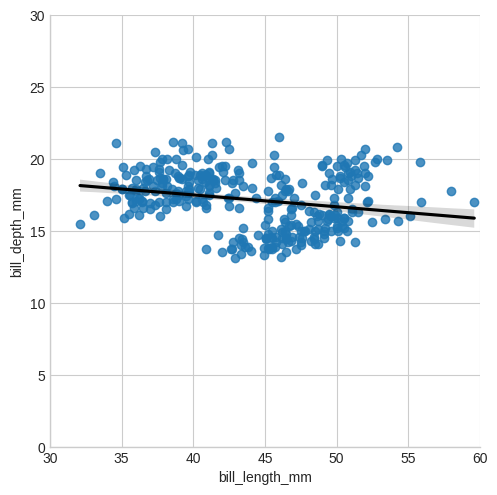

In [127]:
g = sns.lmplot(
    data = penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    line_kws = {'color': 'black'},
)
g.set(xlim = (30, 60), ylim = (0, 30))

lin_reg = scipy.stats.linregress(
    x = penguins.bill_length_mm, 
    y = penguins.bill_depth_mm
)
print( lin_reg )

LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


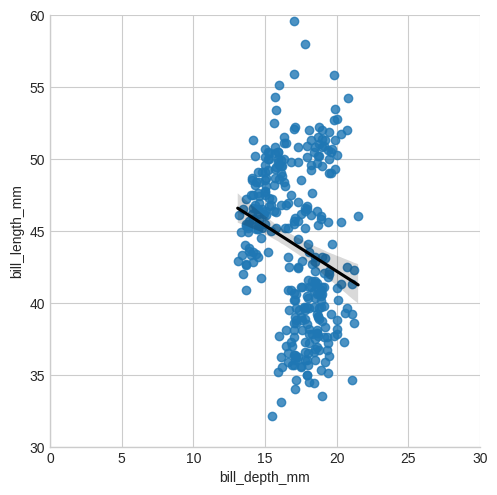

In [126]:
g = sns.lmplot(
    data = penguins,
    y = 'bill_length_mm',
    x = 'bill_depth_mm',
    line_kws = {'color': 'black'},
)
g.set(ylim = (30, 60), xlim = (0, 30))

lin_reg = scipy.stats.linregress(
    y = penguins.bill_length_mm, 
    x = penguins.bill_depth_mm
)
print( lin_reg )

### Discriminating by species

In [95]:
penguins.loc[penguins.species == 'Adelie'].loc[:,['bill_length_mm', 'bill_depth_mm']].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,0.385813
bill_depth_mm,0.385813,1.000000


In [135]:
print("Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm")
for s, sp in penguins.groupby('species'):
    print(s)
    print(sp
          .loc [:, 'bill_length_mm']
          .corr(penguins.loc [:, 'bill_depth_mm']))
    print()


Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm
Adelie
0.3858132004955791

Chinstrap
0.6535362081800429

Gentoo
0.6540233142726541



Chinstrap and Gentoo have good correlation coefficients.

Adelie
LinregressResult(slope=0.17668344293376206, intercept=11.487707126154493, rvalue=0.385813200495579, pvalue=1.5149014096476615e-06, stderr=0.035207899073921585, intercept_stderr=1.3700993275268667)

Chinstrap
LinregressResult(slope=0.2222117240036715, intercept=7.569140119132472, rvalue=0.6535362081800428, pvalue=1.5255389633545055e-09, stderr=0.03167824612459654, intercept_stderr=1.550529277341085)

Gentoo
LinregressResult(slope=0.2076116034225251, intercept=5.120955946776929, rvalue=0.654023314272654, pvalue=7.336623629938379e-16, stderr=0.022200343390120832, intercept_stderr=1.0582575362244255)



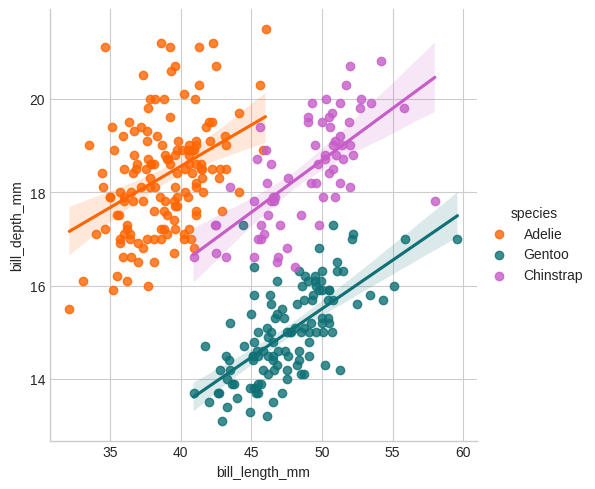

In [134]:
sns.lmplot(
    data=penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species',
    palette = penguin_color,
)

for s, sp in penguins.groupby('species'):
    print(s)
    lin_reg = scipy.stats.linregress(
        x = sp.bill_length_mm, 
        y = sp.bill_depth_mm
    )
    print( lin_reg )
    print()

Adelie
LinregressResult(slope=0.8424775021643981, intercept=23.366818595563203, rvalue=0.385813200495579, pvalue=1.5149014096476615e-06, stderr=0.1678813949724412, intercept_stderr=3.086911870517409)

Chinstrap
LinregressResult(slope=1.922083892366054, intercept=13.427907594445308, rvalue=0.6535362081800428, pvalue=1.5255389633545055e-09, stderr=0.2740100545436943, intercept_stderr=5.056864541498557)

Gentoo
LinregressResult(slope=2.0603207554909613, intercept=16.670181342443946, rvalue=0.654023314272654, pvalue=7.336623629938379e-16, stderr=0.22031441167863897, intercept_stderr=3.311049237566087)



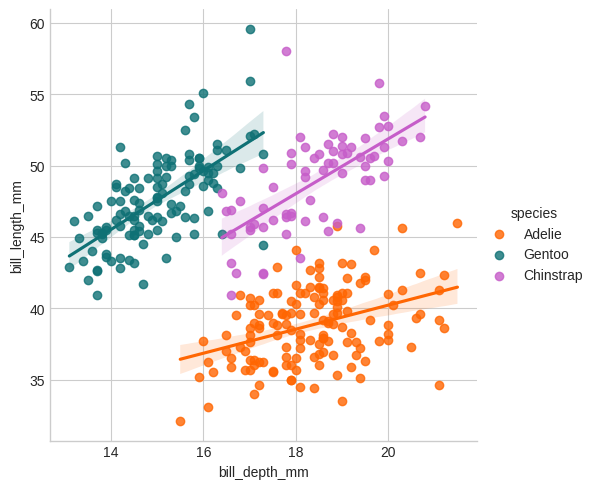

In [138]:
g = sns.lmplot(
    data=penguins,
    y = 'bill_length_mm',
    x = 'bill_depth_mm',
    hue = 'species',
    palette = penguin_color,
)
# g.set(ylim = (30, 60), xlim = (0, 30))

for s, sp in penguins.groupby('species'):
    print(s)
    lin_reg = scipy.stats.linregress(
        y = sp.bill_length_mm, 
        x = sp.bill_depth_mm
    )
    print( lin_reg )
    print()

### Discriminating by species and sex

In [98]:
print("Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm")
for s, sp in penguins.groupby('species_sex_tuple'):
    print( s )
    print(sp
          .loc [:, 'bill_length_mm']
          .corr(penguins.loc [:, 'bill_depth_mm']))
    print()

Pearson's r correlation coefficient for bill_depth_mm vs bill_length_mm
Adelie,female
0.1606361488326864

Adelie,male
-0.03824715618457483

Chinstrap,female
0.2563170802728449

Chinstrap,male
0.44627032516032644

Gentoo,female
0.43044403942836656

Gentoo,male
0.30676747386468406



<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

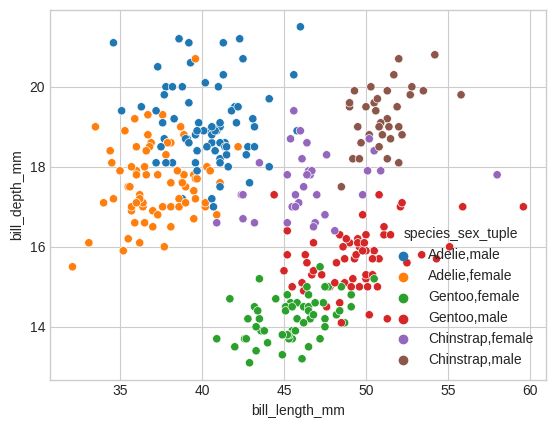

In [140]:
sns.scatterplot(
    data = penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species_sex_tuple',
)


Adelie,female
LinregressResult(slope=0.07466113751304554, intercept=14.840227920438611, rvalue=0.16063614883268637, pvalue=0.1745836406339809, stderr=0.05444341034153927, intercept_stderr=2.031391426192252)

Adelie,male
LinregressResult(slope=-0.01711341356113559, intercept=19.763820546369974, rvalue=-0.03824715618457483, pvalue=0.7480124558863981, stderr=0.053062833435749, intercept_stderr=2.146586466255705)

Chinstrap,female
LinregressResult(slope=0.06440581362211445, intercept=14.588629239099468, rvalue=0.2563170802728448, pvalue=0.14340120989113542, stderr=0.042935455048951424, intercept_stderr=2.003974469680732)

Chinstrap,male
LinregressResult(slope=0.21714339809501618, intercept=8.158190847921704, rvalue=0.44627032516032644, pvalue=0.008156493937242975, stderr=0.07697456942392834, intercept_stderr=3.934736936093045)

Gentoo,female
LinregressResult(slope=0.11336865949647647, intercept=9.072424888770026, rvalue=0.4304440394283665, pvalue=0.0007444326073883297, stderr=0.03176771197

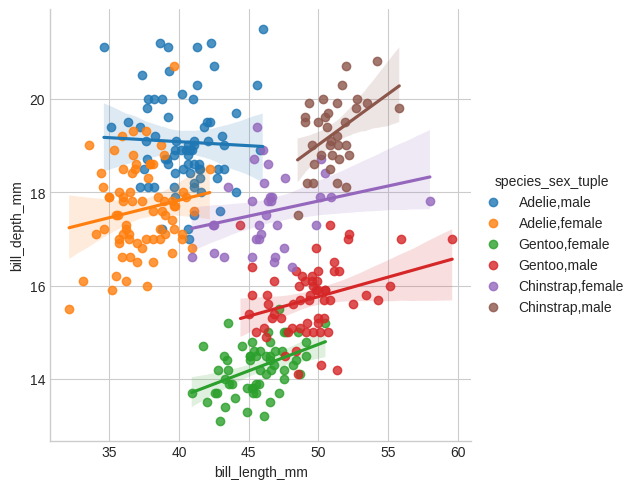

In [141]:
sns.lmplot(
    data=penguins,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species_sex_tuple',
)

for s, sp in penguins.groupby('species_sex_tuple'):
    print(s)
    lin_reg = scipy.stats.linregress(
        x = sp.bill_length_mm, 
        y = sp.bill_depth_mm
    )
    print( lin_reg )
    print()

Adelie,female
LinregressResult(slope=0.34561450804695065, intercept=31.167143792443877, rvalue=0.16063614883268637, pvalue=0.1745836406339809, stderr=0.252024454868526, intercept_stderr=4.447421514477371)

Adelie,male
LinregressResult(slope=-0.08547943699142345, intercept=42.020726303056975, rvalue=-0.03824715618457483, pvalue=0.7480124558863981, stderr=0.2650424540407428, intercept_stderr=5.062158797912905)

Chinstrap,female
LinregressResult(slope=1.0200701139351447, intercept=28.632296231375985, rvalue=0.2563170802728448, pvalue=0.14340120989113542, stderr=0.6800189619621995, intercept_stderr=11.971776513195472)

Chinstrap,male
LinregressResult(slope=0.9171690452755906, intercept=33.435915969488185, rvalue=0.44627032516032644, pvalue=0.008156493937242975, stderr=0.325124746911034, intercept_stderr=6.264355227403315)

Gentoo,female
LinregressResult(slope=1.6343323798864164, intercept=22.294281391203402, rvalue=0.4304440394283665, pvalue=0.0007444326073883297, stderr=0.4579660775749969

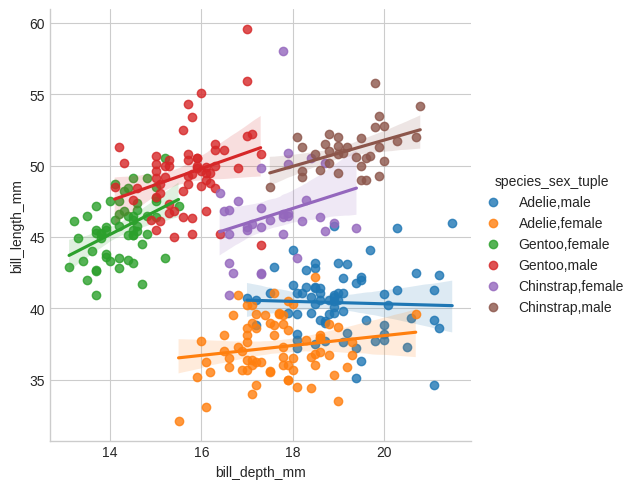

In [142]:
sns.lmplot(
    data=penguins,
    y = 'bill_length_mm',
    x = 'bill_depth_mm',
    hue = 'species_sex_tuple',
)

for s, sp in penguins.groupby('species_sex_tuple'):
    print(s)
    lin_reg = scipy.stats.linregress(
        y = sp.bill_length_mm, 
        x = sp.bill_depth_mm
    )
    print( lin_reg )
    print()
    